<a href="https://colab.research.google.com/github/ricardoricrob76/gerdau/blob/main/GERDAU_Aula_22_Sklearn_Modelo_Supervisionado_Regressao_Linear_2_SVM_e_Metricas_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# GERDAU - Treinamento InCompany
# Autor:  Profº - Ricardo Roberto de Lima - FABWORK
# Ciência de Dados com Python + Pandas, Numpy, SkLearning. Passageiros.csv
# Machine Learning - Aula 22 - Modelos Supervisionados 
# Algoritmo - Regressão Linear + Métricas e Alg. SVM - Parte 2.

# Importando a biblioteca pandas para carregar e visualizar a base de dados
import pandas as pd

In [2]:
passageiros = pd.read_csv('Passageiros.csv')

# Adaptar para o Ambiente da GERDAU.
# import awswrangler as wr

# import boto3
# boto3.setup_default_session(region_name="us-east-2")

# Criar um Objeto do tipo DataFrame no Ambiente Big Data - Gerdau
# passageiros=wr.s3.read_csv('s3://gerdau-analytics/gdata/datascience/Passageiros.csv')

In [3]:
passageiros.head()

,tempo,nPassageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [4]:
#Com as bibliotecas seaborn e matplotlib vamos conseguir gerar gráficos para visualizar a base de dados. 
import seaborn as sns
import matplotlib.pyplot as plt

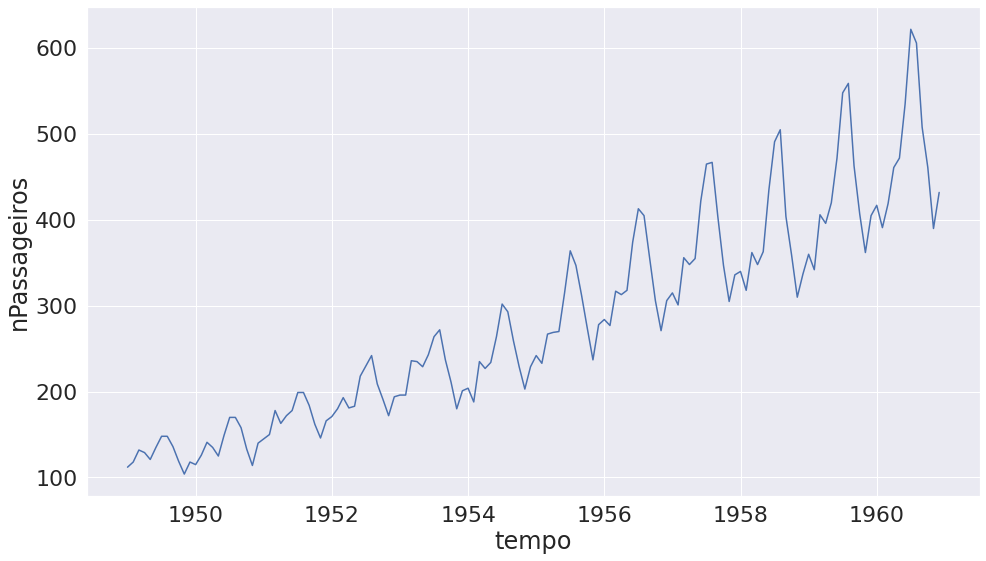

In [5]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.lineplot(x="tempo", y="nPassageiros", data=passageiros)

In [6]:
#Seleciona todas as colunas menos a última
Tempo = passageiros.iloc[:,:-1].values

In [7]:
nPassageiros = passageiros.iloc[:,1].values

In [8]:
#Podemos separar parte dos dados para treino e teste
from sklearn.model_selection import train_test_split

In [9]:
Tempo_treino, Tempo_teste, nPassageiros_treino, nPassageiros_teste = train_test_split(Tempo, nPassageiros, 
                                                                                      test_size = 0.3)

In [10]:
from sklearn import linear_model

In [11]:
regressor = linear_model.LinearRegression()

In [12]:
#Ajustando a reta aos dados de treino
regressor.fit(Tempo_treino,nPassageiros_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
nPassageiros_predito = regressor.predict(Tempo_teste)

In [14]:
import numpy as np

In [15]:
#Colocando os dados em um data frame para posteriormente gerar uma figura com o 
# Seaborn
passageiros_predito = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                    'nPassageiros': nPassageiros_predito,
             })
passageiros_teste = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                    'nPassageiros': nPassageiros_teste,
             })


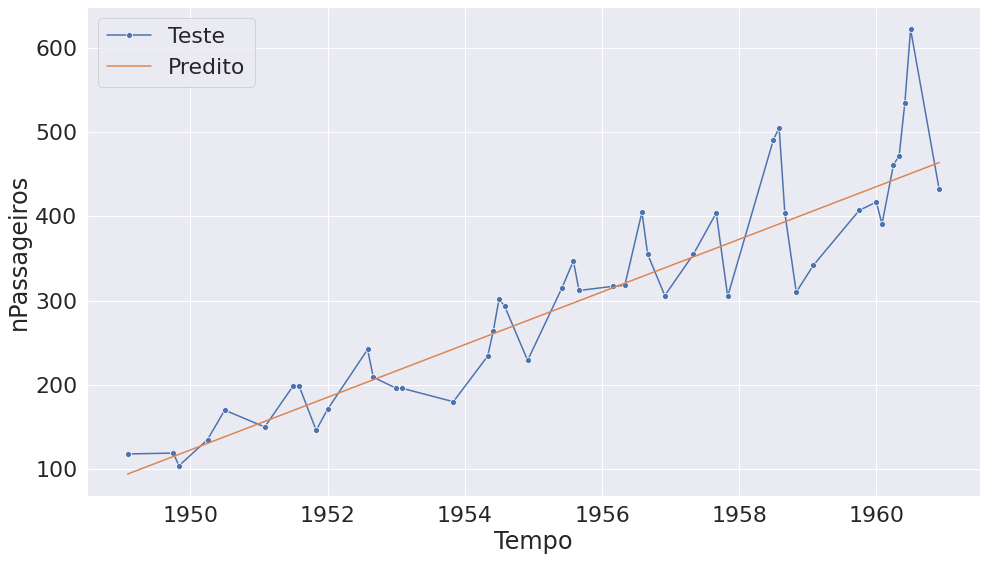

In [16]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.lineplot(x="Tempo", y="nPassageiros", data = passageiros_teste,  marker='o', label = "Teste")
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito, label = "Predito" )

## Medindo a qualidade da regressão

In [17]:
#Extraindo o coeficiente angular da reta ajustada
regressor.coef_

array([31.24581003])

In [18]:
#Extraindo o coeficiente linear da reta ajustada
regressor.intercept_

-60806.57712749774

In [19]:
from sklearn.metrics import r2_score

In [20]:
# r2_score para a reta ajustada
r2_score(nPassageiros_teste,nPassageiros_predito)

0.8374529580965622

## SVM

In [21]:
from sklearn.svm import SVR

In [22]:
# Ajusta o modelo de regressão com a máquina de vetor de suporte
regressor_svr = SVR( C=1000000)
regressor_svr.fit(Tempo_treino,nPassageiros_treino)

SVR(C=1000000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [23]:
nPassageiros_predito_svr = regressor_svr.predict(Tempo_teste)

In [24]:
passageiros_predito_svr = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                    'nPassageiros': nPassageiros_predito_svr,
             })

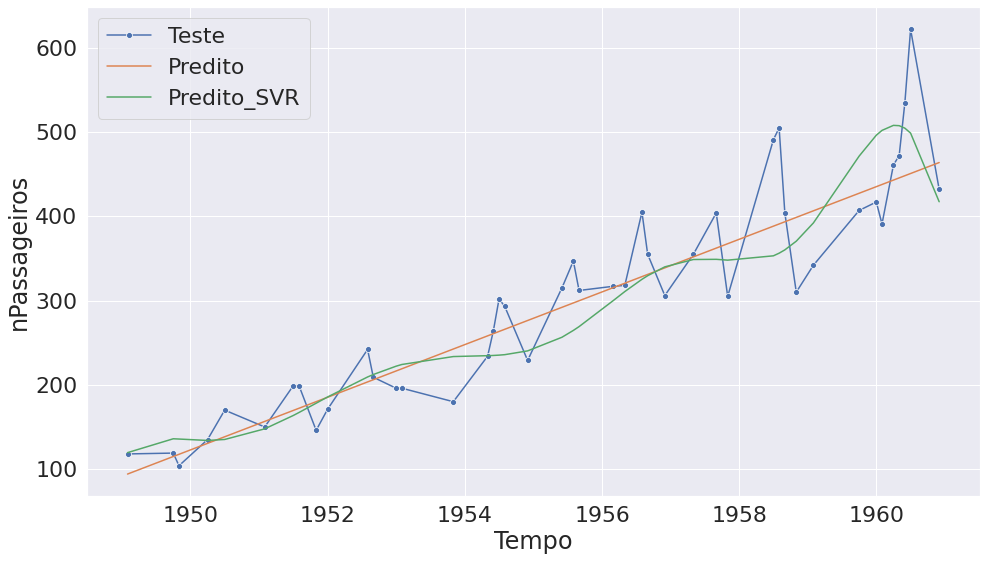

In [25]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.lineplot(x="Tempo", y="nPassageiros", data = passageiros_teste,  marker='o', label = "Teste")
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito, label = "Predito" )
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito_svr, label = "Predito_SVR" )

In [26]:
# r2_score para a curva ajustada
r2_score(nPassageiros_teste,nPassageiros_predito_svr)

0.7970073745175459